# データ分析（2）

《学修項目》
*   クラスター分析
*   次元削減
*   パターン発見（アソシエーション分析）

《キーワード》
> 階層的クラスター分析、非階層的クラスター分析、重心法、群平均法、ウォード法、樹形図（デンドログラム）、k-means法、主成分分析、行列の固有値分解、カーネル法、ガウスカーネル、相関ルール、バスケット分析、支持度、確信度、リフト値、Aprioriアルゴリズム


《参考文献，参考書籍》
*   [1] [東京大学MIセンター公開教材 「1-4 データ分析」](http://www.mi.u-tokyo.ac.jp/pdf/1-4_data_analysis.pdf)[《利用条件CC BY-NC-SA》](https://creativecommons.org/licenses/by-nc-sa/4.0/deed.ja)
*   [2] [応用基礎としてのデータサイエンス（講談社 データサイエンス入門シリーズ）](https://www.kspub.co.jp/book/detail/5307892.html)
*   [3] [データサイエンスの考え方 社会に役立つAI×データ活用のために（オーム社）](https://www.ohmsha.co.jp/book/9784274227974/)
*   [4] [Pythonによるあたらしいデータ分析の教科書 第2版（翔泳社）](https://www.shoeisha.co.jp/book/detail/9784798178776)
*   [5] [数理・データサイエンス・AI公開講座（放送大学）](https://www.ouj.ac.jp/booklet/2022/29_2022_MDS-AI.pdf)

## 1. クラスター分析

### 1.1 概要 [1][2]

企業は、市場の見込み客を特定することができれば効率的なマーケティング戦略が可能になる。
クライアントの属性情報や、利用履歴の情報を用いて、顧客を似た者どうしのグループに細分化し、
グループごとの注文・消費行動などの特徴を調べ、効果的な見込み客の特定を行うことがある。
このようなグループ化を**セグメンテーション**(segmentation) という。
セグメンテーションを行う際に用いられる分析手法が**クラスター分析**（cluster analysis) である[2]。

クラスター分析は、説明変数の情報を利用せず、データを似たもの同士に分類する（教師なし学習）。
どんなデータを似ていると考えるかは、２点間の距離やクラスター間の距離（類似度）の定義による。
距離の定義によって結果が異なることがあることに注意する。

代表的なクラスター分析の方法として、**階層的クラスター分析**と**非階層的クラスター分析**がある[1]。


<figure>
<a href="http://www.mi.u-tokyo.ac.jp/pdf/1-4_data_analysis.pdf#page=48"><img src='https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DS/main/4/UTAI-text/JPEG/1-4_data_analysis_048.jpg' alt='クラスター分析' width='640' border='1'></a>
</figure>


### 1.2 階層的クラスター分析[1]

#### 1.2.1 距離の定義

例えば平面上の2点 $P(x_1,y_1), Q(x_2,y_2)$ に対して、様々な距離が定義される。
通常使われるのはユークリッド距離である。
ミンコフスキー距離は通常、$p$ が1または2の場合が用いられ、これはそれぞれマンハッタン距離とユークリッド距離に対応する。特殊な場合であるが、$p$ が無限に発散する場合はチェビシェフ距離が得られる。

*   **ユークリッド距離** $d(P,Q) = \sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2}$
*   **マンハッタン距離** $d(P,Q) = |x_1 - y_1| + |x_2 - y_2|$
*   次数 $p$ の**ミンコフスキー距離** $d(P,Q) = (|x_1 - y_1|^p + |x_2 - y_2|^p)^{\frac{1}{p}}$
*   **チェビシェフ距離** $d(P,Q) = max(|x_1 - y_1|, |x_2 - y_2|)$



#### 1.2.2 クラスター間の距離（類似度）

階層クラスタリングを行う場合、サンプル同士が何をもって「似ている（もしくは似ていない）」と判断するかによって計算方法が異なる。クラスター間の距離（類似度）には、最短距離法、最長距離法、重心法、群平均法、ウォード法など様々な類似度が提案されている。

*   **最短距離法（単連結法）**：2つのクラスタ間で一番近いデータ同士の距離を、クラスタ間の距離として採用する
*   **最長距離法（完全連結法）**：最短距離法とは逆の手法。クラスタを構成する要素同士のすべての距離の中で最長のものを、クラスタ間の距離として採用する
*   **重心法**：各クラスタを構成する要素の重心位置を求め、その重心間の距離を、クラスタ間の距離として採用する
*   **群平均法**：2つのクラスタを構成するデータのすべての組み合わせの距離を求め、その平均をクラスタ間の距離とする
*   **ウォード法**：それぞれのデータの平方和（それぞれのデータと平均値の差を二乗した値の和）を求め、平方和が小さなものからクラスタを作っていく手法（i.e.平方和が小さいほどデータのばらつきは小さい）

<figure>
<a href="http://www.mi.u-tokyo.ac.jp/pdf/1-4_data_analysis.pdf#page=49"><img src='https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DS/main/4/UTAI-text/JPEG/1-4_data_analysis_049.jpg' alt='クラスター分析' width='640' border='1'></a>
</figure>


### 1.2.3 階層型クラスタリング（デンドログラム）

階層的クラスタリングでは、最初は全てのデータが異なるクラスターに属するものとし、（クラスターの数）=（データ数）とする状態を考える。

次にすべてのクラスター間で最も距離が小さな２つを探し、それらを１つのクラスターに統合し、クラスター間の距離を更新する。以下、このステップを繰り返すことによって、ボトムアップ的にひとつずつクラスター数を減らしていく。

このクラスター統合のときに、Π型にふたつのクラスターを繋ぎ、縦の高さをクラスター間の距離とする（重要）。
この操作を続けていくと、最後にクラスターが全体でひとつの木構造をなすことになる。
クラスター間の関連度も含めて表現した木のことを、**樹形図（デンドログラム）**と言う。


<figure>
<a href="http://www.mi.u-tokyo.ac.jp/pdf/1-4_data_analysis.pdf#page=50"><img src='https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DS/main/4/UTAI-text/JPEG/1-4_data_analysis_050.jpg' alt='クラスター分析' width='640' border='1'></a>
</figure>


統計ソフトウェア R の USArrestsデータには、米国50州における犯罪の人口10万人当たり件数が整理されている。このデータを犯罪種別ごとに標準化して階層的クラスター分析によって作成したデンドログラムを横向きに
表示したものが図1.4.13である。
このデンドログラムのある高さで4つのクラスター群を定義し， 4色で色分けしている。

<figure>
<img src='https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DS/main/5/figures/fig1.4.13.jpg' alt='クラスター分析' width='600' border='1'>
<figcaption>USArrests 犯罪データ(R)のデンドログラム例（[2]より引用）</figcaption>
</figure>

クラスターができたら、クラスターごとに各変数の代表値や標準偏差などを計算し各クラスターの特徴を把握することが重要である。このデータの場合、オレンジと黒のクラスター群は全体的に犯罪件数が多い。緑や青のクラスターは相対的には犯罪件数が少ないなどがわかる。

* [一般社団法人データマーケティングラボラトリー | クラスタ分析](http://d-m-l.jp/Rbiz/task_clus.html)

#### Pythonによる階層クラスター分析 デンドログラムの実装例

階層クラスター分析の具体的な計算方法についてPythonのSciPyライブラリを用いて解説する。
データは、「社会人対象：副業の有無(1/0)・収入・性別(1/0)・年齢・結婚有無(1/0)」のダミーデータ (n=21)である（量的変数、質的変数混在であることに注意）。

* [CSVデータ](https://github.com/MDASH-shinshu/MDASH-T-DS/tree/main/5/resources/)
* [Staat | 階層クラスター分析](https://corvus-window.com/python_hierarchal-clustering/)


In [ ]:
# CSVデータを カレントディレクトリ直下のフォルダ（一時作業領域）へダウンロードする．
!wget -nc https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DS/main/5/resources/sample_data1.csv

# wgetしなくても，Google colab.の左メニュー [ファイル] アイコンをクリックして，ブラウザへファイルをドラッグ＆ドロップしても可

# ファイル (udon.csv)がダウンロード・配置できたことを確認する
!ls -al ./

In [26]:
# 全ての警告メッセージを非表示（オプション）
import warnings
warnings.simplefilter('ignore')

In [27]:
# オリジナルのCSVファイルをpandasで読み込んでデータフレームdfに格納

# ライブラリのインポート
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from scipy.cluster.hierarchy import linkage, dendrogram

# データの読み込み
df = pd.read_csv('sample_data1.csv')
df.columns = ['no','side_job','income','sex','age','married']
df.head()
##df.describe()

,no,side_job,income,sex,age,married
0,0,1,580,1,32,0
1,1,0,430,0,28,0
2,2,1,800,1,45,1
3,3,1,780,0,36,0
4,4,1,690,0,42,1


In [28]:
# 列noを削除後、全ての列で標準化実行
df = scipy.stats.zscore(df.drop('no', axis=1))

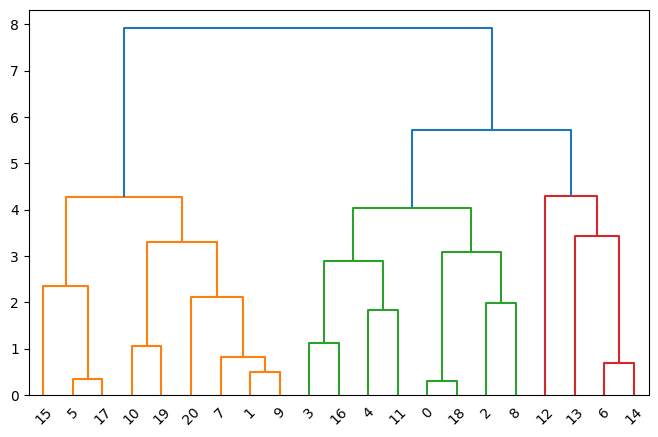

In [29]:
# SciPyライブラリ::cluster.hierarchyによるデンドログラム生成例 - コード引用 https://corvus-window.com/python_hierarchal-clustering/

# クラスタリングの実行（ユークリッド距離、ウォード法）
cluster = linkage(df, method='ward', metric='euclidean')

# 描画領域の定義
plt.figure(num=None, figsize=(8, 5))

# 樹形図の作成・出力
dendrogram(cluster)
plt.show()

# 縦軸を5の位置で切ると3つに分類することができた。それぞれのクラスタ群が何によってグループ化
# されているのか、元のデータに基づいて考察して欲しい（副業ありの場合、高収入な傾向ではある）。

### 1.3 非階層クラスター分析（k-means） [2]

階層的クラスタリングは全データバラバラの状態から、１つずつクラスターを形成していき，最終的に樹形図ができる。しかし全データ間の距離を計算する必要があり、クラスター間の距離の定義によっては毎回距離を更新していく必要があるために、ビッグデータへの適用が困難である。

**非階層的クラスタリング**の代表的な **k-means法** では、樹形図（階層的な構造）を想定せず、予めクラスタ数を与え、適当に定めた初期クラスターから繰り返し計算することで、与えられた距離を最⼩にするようにクラスターを求めるものである[2]。

<figure>
<a href="http://www.mi.u-tokyo.ac.jp/pdf/1-4_data_analysis.pdf#page=53"><img src='https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DS/main/4/UTAI-text/JPEG/1-4_data_analysis_053.jpg' alt='クラスター分析' width='640' border='1'></a>
</figure>


<figure>
<a href="http://www.mi.u-tokyo.ac.jp/pdf/1-4_data_analysis.pdf#page=54"><img src='https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DS/main/4/UTAI-text/JPEG/1-4_data_analysis_054.jpg' alt='クラスター分析' width='640' border='1'></a>
</figure>


#### Pythonによる非階層クラスター分析 k-meansの実装例

非階層クラスター分析の具体的な計算方法について　Scikit-learnライブラリを用いて解説する。

日本の47都道府県の人口千人あたりの新型コロナウイルスの累積感染者数（2021年4月当時）のデータ

* [オリジナルデータとプログラム例（公開教材[1]ただし実装はR）](https://github.com/MDASH-shinshu/MDASH-T-DS/tree/main/4/resources/additional_material/)
* [CSVデータ](https://github.com/MDASH-shinshu/MDASH-T-DS/tree/main/5/resources/)
* [k-means法のpythonによる実装とクラスター数の決定方法 エルボー法、シルエット分析](https://laid-back-scientist.com/k-means)

# memo